<a href="https://colab.research.google.com/github/mmonem1996/Water-Potability/blob/main/ML_Classification_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main Objective and Data Description

The main objective of this project is to understand the varios features of water affect its potability (drinkability).
So in this excersice we will be focused on interpretation.

The analysis is carried out on water_potability.csv available in Kaggle website. This file include 9 features dataset describing various characteristics of water and target variable named potability (1 if potable and 0 if not)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import drive
from shutil import copyfile
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
sns.set_context('notebook')
sns.set_style('dark')

In [3]:
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [4]:
src = '/content/gdrive/MyDrive/Colab Notebooks/Machine Learning - IBM/water_potability.csv'
dst = '/content/water_potability.csv'
copyfile(src, dst)

'/content/water_potability.csv'

In [5]:
data = pd.read_csv(dst)
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


All features variable are Numeric

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# Data Exploration & Preprocessing



1 - The first step is dropping rows with missing values



2 - As we can see see below, the target variable is slightly skewed   toward value "1" (60% "1" + 40% "0"), but we will treat it as if no skewness exist since this slight difference is not of a great influence

In [7]:
data = data.dropna()
data.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

3 - From the correlation analysis below, we can see that there overall slight correlation between the target variable and the features. 
Interestingly, the target variable "*Potability*" correlates the most with "*Solids*" (although as low as 4%), which is the amount of solids dissolved in the water.

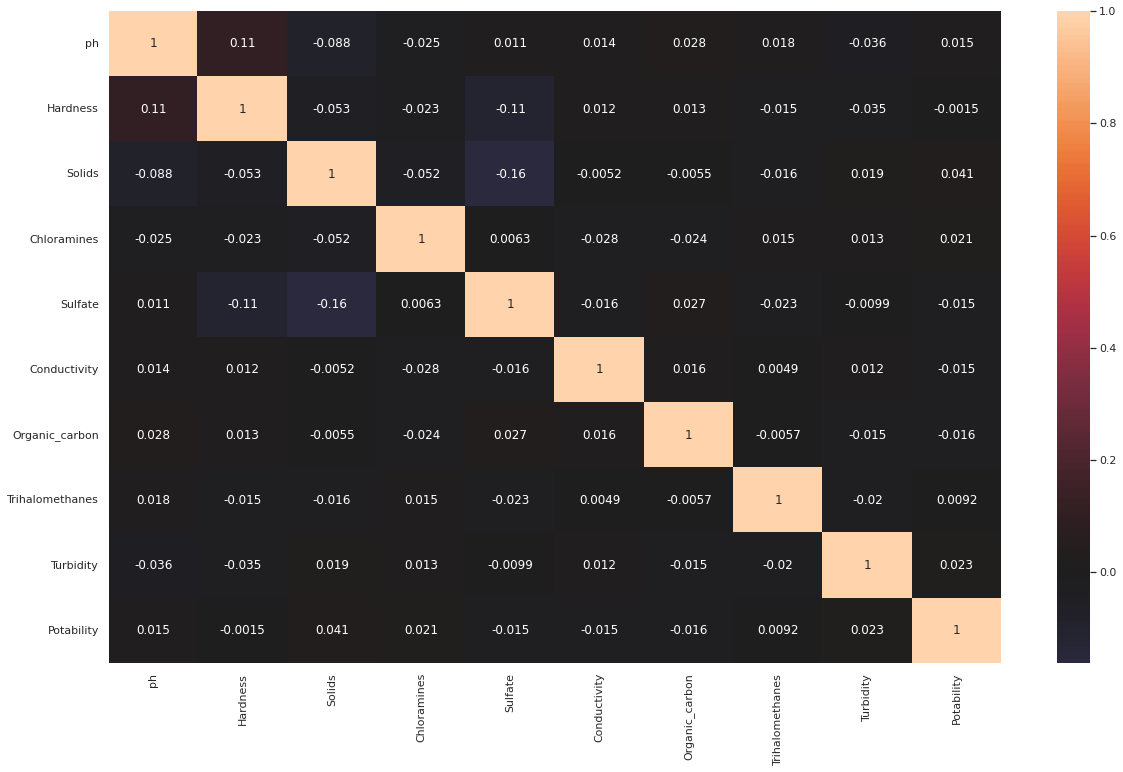

In [8]:
correlation_matrix = data.corr()
_, ax = plt.subplots(figsize = (20, 12))
sns.heatmap(correlation_matrix, center=0, annot=True)

In [9]:
features_correlation = data.corrwith(data['Potability'])\
.to_frame()\
.loc[(data.corrwith(data['Potability']).apply(abs).sort_values(ascending=False).index)[1:],:]\
.reset_index()\
.rename({0:'Correlation with Potability', 'index':'Feature'} , axis=1)
features_correlation

,Feature,Correlation with Potability
0,Solids,0.040674
1,Turbidity,0.022682
2,Chloramines,0.020784
3,Organic_carbon,-0.015567
4,Conductivity,-0.015496
5,Sulfate,-0.015303
6,ph,0.014530
7,Trihalomethanes,0.009244
8,Hardness,-0.001505


4 - Since all of the features are numeric, let's unify the scale of all features before we begin classification training.

In [10]:
scaled_data = data.copy()
scaled_data.loc[:, 'ph':'Turbidity'] = StandardScaler().fit_transform(scaled_data.loc[:, 'ph':'Turbidity'])
scaled_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2.011000e+03,2.011000e+03,2.011000e+03,2.011000e+03,2.011000e+03,2.011000e+03,2.011000e+03,2.011000e+03,2.011000e+03,2011.000000
mean,-1.809702e-16,6.192212e-17,-3.670195e-16,-7.800649e-17,1.647392e-16,7.197955e-16,4.085908e-16,-6.961512e-16,-4.171479e-16,0.403282
std,1.000249e+00,1.000249e+00,1.000249e+00,1.000249e+00,1.000249e+00,1.000249e+00,1.000249e+00,1.000249e+00,1.000249e+00,0.490678
min,-4.360285e+00,-3.753822e+00,-2.499568e+00,-3.624952e+00,-4.957520e+00,-2.787207e+00,-3.657409e+00,-3.597551e+00,-3.229792e+00,0.000000
25%,-6.333763e-01,-5.891793e-01,-7.293646e-01,-6.282674e-01,-6.212455e-01,-7.416563e-01,-6.719362e-01,-6.500419e-01,-6.752701e-01,0.000000
50%,-3.731406e-02,3.750786e-02,-1.138794e-01,6.038933e-03,-2.409264e-02,-3.805190e-02,-1.073680e-02,8.793486e-03,-1.988993e-03,0.000000
75%,6.147568e-01,6.274870e-01,6.093855e-01,6.156096e-01,6.337160e-01,6.920935e-01,6.995330e-01,6.775954e-01,6.978723e-01,1.000000
max,4.395582e+00,3.719930e+00,4.001258e+00,3.782229e+00,3.587965e+00,4.050143e+00,3.805203e+00,3.583571e+00,3.236574e+00,1.000000


# Classification Models

# Logistic Regression

In [11]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegressionCV

In [12]:
X = scaled_data.drop(columns='Potability')
y = scaled_data['Potability']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=56)

In [13]:
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
lg = LogisticRegressionCV(cv=kfold)
lg.fit(Xtrain, ytrain)
lg.score(Xtest, ytest)

0.6109271523178808

In [33]:
lr_importances = pd.DataFrame(list(zip(X.columns, lg.coef_[0])), columns=['Feature', 'Importance'])
lr_importances = lr_importances.sort_values(by='Importance', ascending=False, key=np.abs).reset_index(drop=True)
lr_importances
# _, ax = plt.subplots(figsize = (12, 7))
# ax = sns.barplot(data=lr_importances, x='Feature', y='Importance')
# ax.bar(range(len(X.columns)), lg.coef_[0])
# ax.set(xlabel='Features', ylabel='Coefficients', title='Feature Importances (Coefficients)')
# ax.set_xticks(ticks=range(len(X.columns)))
# ax.set_xticklabels(X.columns)
# _ = plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode="anchor")

,Feature,Importance
0,Solids,0.002592
1,ph,0.001613
2,Conductivity,0.001498
3,Chloramines,0.001379
4,Sulfate,-0.001288
5,Trihalomethanes,0.001003
6,Organic_carbon,-0.000911
7,Hardness,-0.000356
8,Turbidity,0.000170


# Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
n_trees = np.arange(50, 1000, 50)
rfc = RandomForestClassifier(oob_score=True, warm_start=True)

scores = []
for nt in np.asarray(n_trees, dtype=np.int32):
  rfc.set_params(n_estimators=nt)
  rfc.fit(Xtrain, ytrain)
  scores.append(rfc.oob_score_)

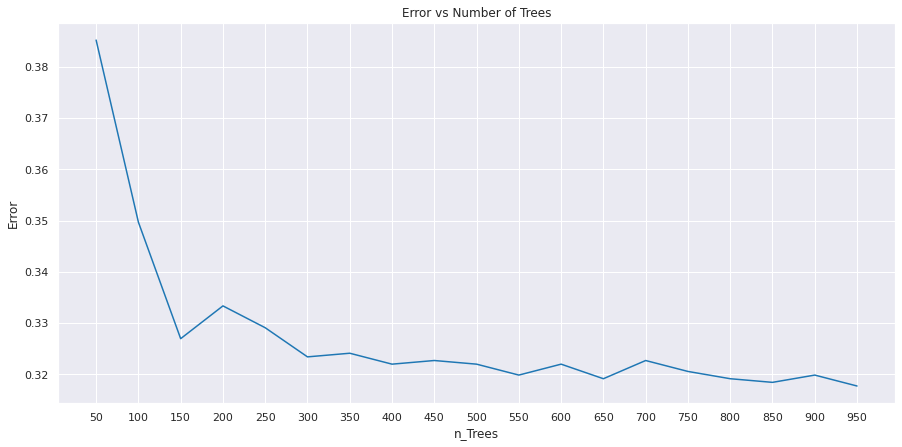

In [17]:
_, ax = plt.subplots(figsize=(15,7))
ax = sns.lineplot(x=n_trees, y=(1 - np.array(scores)))
ax.set(xlabel='n_Trees', ylabel='Error', title='Error vs Number of Trees')
ax.grid(True)
_ = ax.set_xticks(n_trees)

In [18]:
best_rfc = RandomForestClassifier(n_estimators=500, oob_score=True).fit(Xtrain, ytrain)
best_rfc.score(Xtest, ytest)

0.6837748344370861

In [19]:
importances = best_rfc.feature_importances_
importances

array([0.13905385, 0.11629822, 0.11040182, 0.11623572, 0.14362828,
       0.09398491, 0.09205881, 0.09520824, 0.09313015])

In [23]:
rfc_importances = pd.DataFrame(zip(X.columns, importances),columns=['Feature', 'Importance'])
rfc_importances = rfc_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)
rfc_importances

,Feature,Importance
0,Sulfate,0.143628
1,ph,0.139054
2,Hardness,0.116298
3,Chloramines,0.116236
4,Solids,0.110402
5,Trihalomethanes,0.095208
6,Conductivity,0.093985
7,Turbidity,0.093130
8,Organic_carbon,0.092059


# Support Vector Machine

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

In [25]:
param = {'kernel':('linear', 'rbf'), 'C': np.geomspace(1, 10, 10)}
svmCV = GridSearchCV(SVC(), param)

In [26]:
svmCV.fit(Xtrain, ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([ 1.        ,  1.29154967,  1.66810054,  2.15443469,  2.7825594 ,
        3.59381366,  4.64158883,  5.9948425 ,  7.74263683, 10.        ]),
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [27]:
svc_model = svmCV.best_estimator_
svc_model.score(Xtest, ytest)

0.7019867549668874



*   Since SVM radial based lernel does not offer a method for exracting feature importances, we will use [Permutation_Importance](https://scikit-learn.org/stable/modules/permutation_importance.html) function from sklearn library



In [28]:
simportances = permutation_importance(svc_model, Xtest, ytest)
simportances['importances_mean']

array([0.07086093, 0.03013245, 0.03675497, 0.03112583, 0.09768212,
       0.01490066, 0.01092715, 0.00794702, 0.00993377])

In [29]:
svc_importance = pd.DataFrame(zip(X.columns, simportances['importances_mean']), columns=['Feature', 'Importance'])
svc_importance = svc_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)
svc_importance

,Feature,Importance
0,Sulfate,0.097682
1,ph,0.070861
2,Solids,0.036755
3,Chloramines,0.031126
4,Hardness,0.030132
5,Conductivity,0.014901
6,Organic_carbon,0.010927
7,Turbidity,0.009934
8,Trihalomethanes,0.007947
